# Toronto Bikeshare Project - Exploratory Data Analysis

As mentioned in the first notebook `Toronto_Bikeshare_1_DataCleaning`, the Toronto Bikeshare Project aims to use open source data from [Toronto's Bikeshare Program](https://bikesharetoronto.com/pricing/?gclid=Cj0KCQiAz9ieBhCIARIsACB0oGIMFeM961gRm3NjO-8os2Q4FqV7dm4YVdArkEpCOa5caaQnc2nRWe4aAhUuEALw_wcB) and conduct Time Series as well as Network Analysis on it. The aim is to predict ridership changes on different temporal intervals as well as look at how ridership occurs for a potential bike from 1 station over a few days. These kind of analyses can assist with operational decisions for the organisation such as when to potentially increase bike availability in certain stops based on day or week or where additional stops can be added based on usage pattterns. 

In this notebook the cleaned data will be loaded and explored further to get potential insights that can assist with the modelling of data later. Let's start by loading the cleaned data from the previously exported csv file. 

In [1]:
# import pandas to work with dataframes
import pandas as pd


date_cols = ['start_time','end_time']
#import the data
tor_biking = pd.read_csv(f'data/cleaned/cleaned.csv', index_col=0, parse_dates=date_cols)




After ensuring that the data is loaded correctly and the columns data types are preserved, we can continue exploring the different columns of the data. 

In [2]:
tor_biking.head()

,trip_id,trip_duration,start_station_id,start_time,start_station_name,end_station_id,end_time,end_station_name,bike_id,annual_member
0,14805109,72.25,7334,2022-01-01 00:02:00,Simcoe St / Wellington St North,7269,2022-01-01 01:15:00,Toronto Eaton Centre (Yonge St),5139,0
1,14805110,2.10,7443,2022-01-01 00:02:00,Dundas St E / George St,7270,2022-01-01 00:05:00,Church St / Dundas St E - SMART,3992,1
2,14805112,15.70,7399,2022-01-01 00:04:00,Lower Jarvis / Queens Quay E,7686,2022-01-01 00:19:00,7686,361,1
3,14805113,70.93,7334,2022-01-01 00:04:00,Simcoe St / Wellington St North,7269,2022-01-01 01:15:00,Toronto Eaton Centre (Yonge St),4350,0
4,14805114,72.55,7334,2022-01-01 00:05:00,Simcoe St / Wellington St North,7038,2022-01-01 01:17:00,Dundas St W / Yonge St,5074,0


The data seems to display properly. 

In [3]:
tor_biking.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5197925 entries, 0 to 5197924
Data columns (total 10 columns):
 #   Column              Dtype         
---  ------              -----         
 0   trip_id             int64         
 1   trip_duration       float64       
 2   start_station_id    int64         
 3   start_time          datetime64[ns]
 4   start_station_name  object        
 5   end_station_id      int64         
 6   end_time            datetime64[ns]
 7   end_station_name    object        
 8   bike_id             int64         
 9   annual_member       int64         
dtypes: datetime64[ns](2), float64(1), int64(5), object(2)
memory usage: 436.2+ MB


Seems like reloading the data has converted the datetime data to object. We will re-convert those columns.

It looks, fine. A data dictionary is created below to better understand each column. The data contains the following columns.

|Column Name   | Data Type | Column Description |   
|:---|:---|:---|
|  trip_id | int64  | Unique identification number for the trip  |
|  trip__duration | float64 | Duration of the trip in minutes  |
|  start_station_id | int64  |  Unique identification number for the station where the trip started|
|  start_time	 | datetime64[ns] | Date and time in hours and minutes for the start time of the trip  |
|  start_station_name	| object |  Name of station where the trip started |
|  end_station_id	 | int64  | Unique identification number for the station where the trip ended  |
|  end_time	| datetime64[ns] |  Date and time in hours and minutes for the end time of the trip |
|  end_station_name | object |  Name of station where the trip ended |
|  bike_id	 | int64  | Unique identification number for the bike used  |
|  annual_member | int64  | Whether the user who undertook the trip in an Annual Member, with 1 denoting that the member is an annual number  |


The first column to explore will be `Trip Duration`.

## Trip Duration

The distribution of trips can tell us the overall ridership trends. However, to understand the ridership behaviour better, it would be vital to look at the membership and non-membership types as well as the associated pricing that Toronto bikeshare provides. 


At the time of this study there was a change in the pricing.

**Before April 2023, there were 4 types of trips that could be taken:**
- `Single Trip` for `$3.25`. Lasts up to 30 minutes in original payment.
- `24 Hour Access Pass` for `$7`. Unlimited 30 minute trips for 24 hours.
- `72 Hour Access Pass` for `$15`. Unlimited 30 minute trips for 72 hours.
- `Annual 30 Membership` for `$99`. Unlimited 30 minute trips for a year.
- `Annual 45 Membership` for `$115`. Unlimited 45 minute trips for a year.

There were Overage Fees applied if the rider went above the required number of minutes. The overage fees pre-April 2023 can be found in the tables below.


|   Annual 30 & Short Term Passes Trip Time   |   Overage Fees ($)   |
|    :-:    |    :-:    |
|    0:01 - 30:00	|   0.00  	|
|   30:01 - 60:00 	|   4.00	|
|   60:01 – 90:00   |   8.00	|
|   90:01 – 120:00 	|   12.00	|
|   120:01 – 150:00	|   16.00	|
|   150:01 – 180:00	|   20.00	|



|   Annual 45 Membership Trip Time   |   Overage Fees ($)   |
|    :-:    |    :-:    |
|    0:01 – 45:00	|   0.00  	|
|   45:01 – 75:00 	|   4.00	|
|   75:01 – 105:00  |   8.00	|
|   105:01 – 135:00 |   12.00	|
|   135:01 – 165:00	|   16.00	|
|   165:01 – 195:00	|   20.00	|


**We can also see how the pricing changed post April 3rd 2023.**

We can see the [membership and non-membership types as well as the associated pricing](https://bikesharetoronto.com/pricing/?gclid=CjwKCAiAxP2eBhBiEiwA5puhNc7wMh_IeT4mBU3r_HZMTHb_ehtGvQ_P_ghRDR2HPL-eQ50tZ76w8hoCNiMQAvD_BwE) that Toronto bikeshare provides. At the time of this study (May
2023), there are 4 types of trips that can be taken:
- `Pay As You Go Pass` `$1` charge to unlock the bike followed by:
    - `$0.12/minute` for classic bikes or
    - `$0.20/minute` for e-bikes
    
    
- `Day Pass` for `$15`. Unlimited 90 minute rides on a classic bike for 24 hours.


- `Annual 30 Membership` for `$105`. Unlimited 30 minute trips for a year.
    - `50%` off e-bike per minute rate `($0.10/min)`
    - No unlock fees
    
    
- `Annual 45 Membership` for `$120`. Unlimited 45 minute trips for a year.
    - `50%` off e-bike per minute rate `($0.10/min)`
    - No unlock fees


There are Overage Fees applied if the rider goes above the require number of minutes. The overage fees can be found in the tables below.


|   Annual 30 & 45 Term Passes Trip Time   |   Overage Fees ($)   |
|    :-:    |    :-:    |
|   30:01 Onwards|    0.12 per minute	|


This information can therefore assist us in looking at the distribution of rides. Let's start by looking at the descriptive statistics for `Trip Duration` below. 

### Trip Duration

The summary statistics can be visualized using `.describe()`.

In [4]:
tor_biking.trip_duration.describe()

count    5.197925e+06
mean     1.591296e+01
std      8.948605e+01
min      0.000000e+00
25%      7.080000e+00
50%      1.170000e+01
75%      1.875000e+01
max      5.985757e+04
Name: trip_duration, dtype: float64

In [5]:
print(f'The longest trip is {tor_biking.trip_duration.max()} minutes and the shortest trip is {tor_biking.trip_duration.min()} minutes for {tor_biking.shape[0]} data points.')

The longest trip is 59857.57 minutes and the shortest trip is 0.0 minutes for 5197925 data points.


The maximum value seems to be outrageously high and could be the result of the bike being abandoned or not properly docked.

In [6]:
print(f"The mean for trip duration {round(tor_biking.trip_duration.describe()[1], 2)} minutes with the median {round(tor_biking.trip_duration.describe()[2],2)} minutes. This shows that the overall distribution is skewed.")

The mean for trip duration 15.91 minutes with the median 89.49 minutes. This shows that the overall distribution is skewed.


With a mean which is in low double digits and a median in high double digits, there is clearly a skew to the data. This incorporated with values that are as high as ~6000 minutes, we can set a threshold for what we consider to be too high of a value. Considering 24 hours is 1440 minutes, we can see how many bikes in the dataset were kept for longer than a day.

In [7]:
print(f"There are {tor_biking[tor_biking['trip_duration'] > 1440].shape[0]} trips where the duration is longer than a day. This is just {round(tor_biking[tor_biking['trip_duration'] > 1440].shape[0]/tor_biking['trip_duration'].shape[0],4)}% of the data.")

There are 816 trips where the duration is longer than a day. This is just 0.0002% of the data.


In [8]:
# Import plotting libraries 
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
duration_less_than_eq_2h = tor_biking[tor_biking['trip_duration'] <= 120]
duration_more_than_2h = tor_biking[tor_biking['trip_duration'] > 120]

In [10]:
print(f"There are {duration_less_than_eq_2h.shape[0]} rows where the duration is more than or equal to 2 hours. Further there are {duration_more_than_2h.shape[0]} rows where the duration is more than 2 hours")

There are 5176949 rows where the duration is more than or equal to 2 hours. Further there are 20976 rows where the duration is more than 2 hours


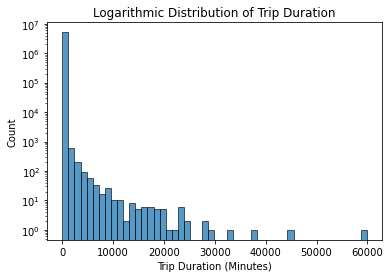

In [11]:
plt.figure()
sns.histplot(tor_biking['trip_duration'], bins=50)
plt.xlabel('Trip Duration (Minutes)')
plt.yscale('log')
plt.title('Logarithmic Distribution of Trip Duration')
plt.show()

### Windows Functions Usage

Using windows functions to look at end to start time lag and put a 1 in column if it's less than 1 minute. 